<a href="https://colab.research.google.com/github/yyujnn/Deep_Learning/blob/main/ex05__%EC%86%90%EA%B8%80%EC%94%A8%EC%88%AB%EC%9E%90%EB%8D%B0%EC%9D%B4%ED%84%B0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀
- 출력층 units = 1, activation = 'linear'
- loss = MSE(평균제곱오차)

# 분류
## 이진분류
- 출력층 units = 1, activation = 'sigmoid'
- loss = 'binary_crossentropy'

## 다중분류
- 출력층 units = 클래스의 수, activation = 'softmax'
- loss = 'categorical_crossentropy'

### 목표
- 신경망을 활용하여 다중 분류에 필요한 keras의 기능을 활용해보자!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

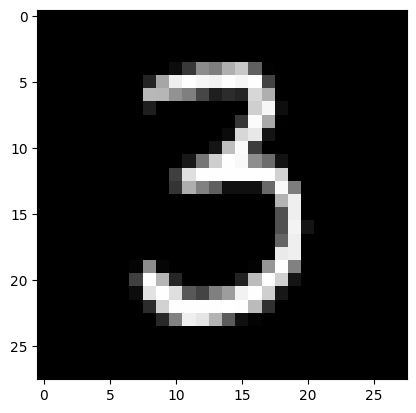

In [ ]:
# 50번째 이미지 확인해보기
plt.imshow(X_train[50], cmap = 'gray')
plt.show()

In [ ]:
y_train[50]

3

In [ ]:
# 클래스의 개수 확인 - 10개
print(np.unique(y_train))
print(np.unique(y_train).size)
print(np.unique(y_train, return_counts = True))

[0 1 2 3 4 5 6 7 8 9]
10
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


### MLP 신경망 설계

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# 크기확인
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)
# from tensorflow.keras.utils import to_categorical

(60000, 10)
(10000, 10)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
X_train2 = X_train.reshape(60000, 28*28)
X_test2 = X_test.reshape(10000, 28*28)

In [ ]:
X_test.reshape(10000, 28*28).shape

(10000, 784)

In [ ]:
model_mlp = Sequential()
model_mlp.add(Dense(300, input_dim = 784, activation = 'relu'))
model_mlp.add(Dense(200, activation = 'relu'))
model_mlp.add(Dense(50, activation = 'relu'))

model_mlp.add(Dense(10, activation='softmax'))

In [ ]:
# 학습/평가 방법 설정
model_mlp.compile(loss='sparse_categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

In [ ]:
# 학습
mlp_history = model_mlp.fit(X_train2, y_train, validation_split=0.3,
                            epochs = 50)

Epoch 1/50
1313/1313 [==============================] - 19s 13ms/step - loss: 1.1617 - accuracy: 0.7912 - val_loss: 0.5318 - val_accuracy: 0.8898
Epoch 2/50
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3317 - accuracy: 0.9169 - val_loss: 0.2566 - val_accuracy: 0.9385
Epoch 3/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2139 - accuracy: 0.9431 - val_loss: 0.2946 - val_accuracy: 0.9311
Epoch 4/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1644 - accuracy: 0.9533 - val_loss: 0.1971 - val_accuracy: 0.9534
Epoch 5/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1365 - accuracy: 0.9628 - val_loss: 0.2193 - val_accuracy: 0.9498
Epoch 6/50
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1227 - accuracy: 0.9670 - val_loss: 0.1902 - val_accuracy: 0.9556
Epoch 7/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.1125 - accuracy: 0.9709 - val_loss: 0.1727 - val_

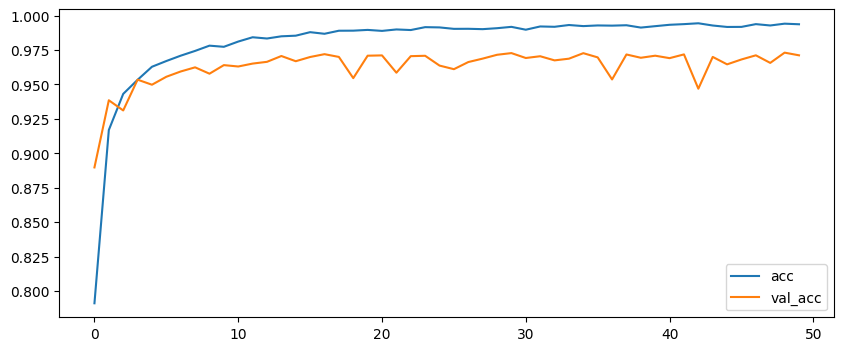

In [ ]:
plt.figure(figsize = (10,4))

plt.plot(mlp_history.history['accuracy'], label='acc')
plt.plot(mlp_history.history['val_accuracy'], label='val_acc')

plt.legend()
plt.show()

In [ ]:
X_test[1:2]

In [ ]:
# 예측
pre = model_mlp.predict(X_test2[1:2])
print(pre)
print('예측한 숫자 :' , pre.argmax())
print('실제 답 : ', y_test[1])

1/1 [==============================] - 0s 91ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
예측한 숫자 : 2
실제 답 :  2


### CNN 모델 설계

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer

In [ ]:
# CNN모델 -> cnn(특징 찾기!) + mlp(분류)
# cnn : 이미지 내의 중요 요소, 특징을 찾아내어 학습에 적용시켜줌!
# 위치, 크기에 덜 민감하게 작용 -> 정확도, 성능이 높은 모델링!

#  CNN 모델의 뼈대
model_cnn = Sequential() # 뼈대 구축

# 입력층
model_cnn.add(InputLayer(input_shape = (28,28,1))) # 흑백 : 1, 컬러 : 3

# cnn - 특성추출부
# 커널 갯수(돋보기 갯수) : 32, 커널 크기(돋보기 크기) : 4:4
model_cnn.add(Conv2D(32, kernel_size=(4,4), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

model_cnn.add(Conv2D(64, kernel_size=(4,4), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))



# mpl층(분류, 예측부)
# 이전까지는 2차원, 찾은 특징을 통해 분류할 수 있도록 1차원으로 펴주어야 함
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
# 출력충
model_cnn.add(Dense(128, activation= 'softmax'))


In [ ]:
# 모델 구조 확인
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
# 학습/ 평가 방법 설정
model_cnn.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

In [ ]:
cnn_history = model_cnn.fit(X_train, y_train,
                            validation_split = 0.3,
                            epochs = 50)

Epoch 1/50
1313/1313 [==============================] - 17s 5ms/step - loss: 0.2523 - accuracy: 0.9515 - val_loss: 0.0783 - val_accuracy: 0.9773
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0619 - accuracy: 0.9815 - val_loss: 0.0782 - val_accuracy: 0.9812
Epoch 3/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 4/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.1178 - val_accuracy: 0.9703
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0371 - accuracy: 0.9880 - val_loss: 0.0789 - val_accuracy: 0.9809
Epoch 6/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0613 - val_accuracy: 0.9846
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0530 - val_accuracy

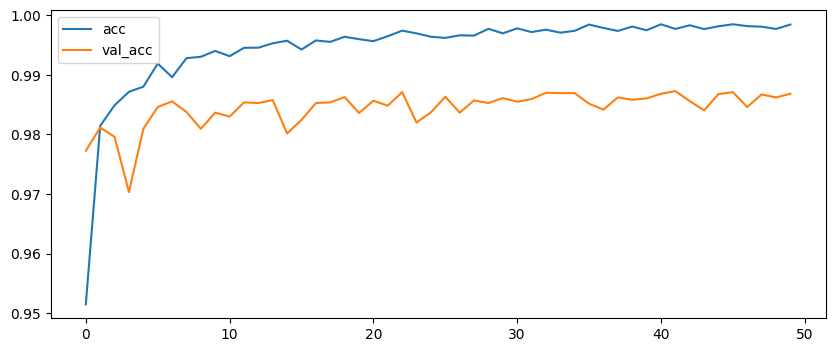

In [ ]:
# 시각화 해보기
plt.figure(figsize = (10,4))

plt.plot(cnn_history.history['accuracy'], label='acc')
plt.plot(cnn_history.history['val_accuracy'], label='val_acc')

plt.legend()
plt.show()